### 問2 - 1.  /  Problem 2 - 1.

In [1]:
import numpy as np
A = np.array ( [
 [  0,   1,   2  ], 
 [  3,   4,   5  ],
 [  6,   7,   8  ],
 [  9,  10,  11  ]
] )

(1) 以下の、4要素から成る1次元配列 / The following 1-d array with 4 elements  
```[  1   4   7   10 ]```

In [2]:
B = A[:, 1]
print( B )

[ 1  4  7 10]


(2) 以下の、4行1列の2次元配列 / The following 2-d array with 4 rows and 1 column    
``[ [ 1 ] 
   [ 4 ]
   [ 7 ] 
   [ 10 ] ]```

In [4]:
B = A[:, 1:2]
print( B )

[[ 1]
 [ 4]
 [ 7]
 [10]]


(3) 以下の、2行2列の2次元配列 / The following 2-d array with 2 rows and 2 columns  
```[ [  4     5  ]
   [  7     8  ] ]```

In [5]:
B = A[1:3, 1:3]
print( B )

[[4 5]
 [7 8]]


***

### 問2 - 3.  /  Problem 2 - 3.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import metrics

csvファイルのすべての数値データを2次元配列datに読み込む。  
Read all numerical data in csv file into 2-d array "dat".  

In [9]:
dat = np.loadtxt(  'data/cs2-data-midterm.csv',  delimiter=",",  skiprows=2  )
print(dat.shape)

(399, 2)


datの1列目全体を1次元配列として取り出して配列x に代入。  
Extract entire first column of "dat" as a 1-d array and put it into "x".  
datの2列目全体を1次元配列として取り出して配列y に代入。  
Extract entire second column of "dat" as a 1-d array and put it into "y".  

In [13]:
x = dat[   :, 0   ]
y = dat[   :, 1   ]
print(x.shape)
print(y.shape)

(399,)
(399,)


dat に対して、クラスタ数2 の k-means法を実行し、結果を配列km に代入。  
Apply k-means clustering (#clusters is two) to "dat" and put the result into "km".  

In [14]:
km = KMeans(  n_clusters=2  ).fit_predict(   dat   )

クラスタ番号0, 1の点のx座標とy座標を、それぞれ配列x0, y0および配列x1, y1に取り出す。  
Extract x, y coordinates of points of cluster 0 and cluster 1, and put them into "x0", "y0", and "x1", "y1", respectively.  

In [15]:
x0 = x[   km == 0   ]
y0 = y[   km == 0   ]
x1 = x[   km == 1   ]
y1 = y[   km == 1   ]

散布図(クラス0:青点、クラス1:緑点)の描画(軸ラベルと凡例を入れる)。   
Draw a scatter plot (class 0: blue, class 1: green) with axis labels and a legend.

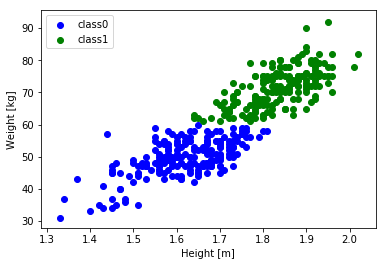

In [16]:
plt.scatter(  x0, y0,  color='blue',  label='class0'  )
plt.scatter(  x1, y1,  color='green',  label='class1'  )
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.legend()
plt.show()

In [20]:
r, p=pearsonr(x, y)
print(r, p)

0.8746978314771214 6.049475988412158e-127


In [25]:
x_2d=dat[:, :1] # .fit require 2d array
print( x_2d.shape )

#Find the line present the data set
reg=LinearRegression()
reg.fit(x_2d, y)
pred=reg.predict(x_2d)
print()

#Take the line y = a+b*x
a=reg.intercept_
b=reg.coef_[0]
print("a:", a)
print("b:", b)
print()

#Calculate Error between realNumber with predictedNumber
MSE=metrics.mean_squared_error(y, pred)
R2=metrics.r2_score(y, pred)
print("MSE:", MSE)
print("R2:", R2)

(399, 1)

a: -76.10095787253232
b: 79.00222075037989

MSE: 35.03440427789719
R2: 0.7650962963907789


(399, 2)
r, p: 0.8746978314771214 6.049475988412158e-127
a, b: -76.10095787253232 79.00222075037989
MSE, R2: 35.03440427789719 0.7650962963907789


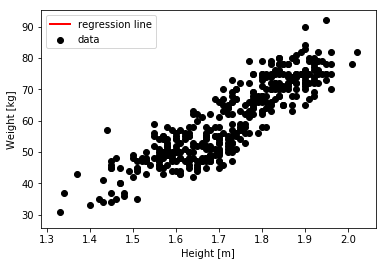

In [28]:
dat = np.loadtxt(  'data/cs2-data-midterm.csv',  delimiter=",",  skiprows=2  )
print(   dat.shape   )

#Extract the entire first column of dat as a 2d array and assign it to an array xx.
#Extract the entire first column of dat as a 1d array and assign it to an array x.
#Extract the entire second column of dat as a 1d array and assign it to an array y.

xx = dat[   :, :1   ]
x = dat[   :,0   ]
y = dat[   :,1   ]

#Compute and display correlation coefficient r and p value between the entire first column and the entire second column.

r, p = pearsonr(   x, y   )
print( 'r, p:', r,  p )

#Consider the first column data as (  Problem2-6  ) variable, the second column data as (  Problem2-7  ) variable and conduct a simple linear regression.
#(Create an object reg_obj for regression computation)

reg_obj = LinearRegression()
reg_obj.fit(   xx, y   )

#Estimating the values of Y against the first column data and assign them to an array e.
#Compute and display the regression coefficients a, and b.

e = reg_obj.predict(   xx   )
a = reg_obj.intercept_
b = reg_obj.coef_[0]
print( 'a, b:', a,  b )

#nation coefficient R2 of the regresssion line.

MSE = metrics.mean_squared_error(   y,e   )
R2 = metrics.r2_score(   y,e   )
print( 'MSE, R2:', MSE, R2 )

#Preparation for drawing the regression line (the red line)

min_x = np.amin(x)
max_x = np.amax(x)
xr = np.array(   min_x, max_x   )
yr = a + b * xr

#Plotting a scatter plot for all data and the regression line(Add axis labels and a legend).

plt.scatter(  x,y,  color='black',  label='data'  )
plt.plot( xr, yr,  color='red',linewidth=2,  label='regression line' )
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.legend()
plt.show()
